# Sales Analysis

In [1]:
import pandas as pd
import os

In [2]:
#just note on moving files. Terminal: mv [file] [directory]

### Merge data from all the csv's

In [3]:
df = pd.read_csv("./practiceSalesData/SalesAnalysis/Sales_data/Sales_April_2019.csv")
df.head() #just looking. Now need to merge

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
files = [file for file in os.listdir('./practiceSalesData/SalesAnalysis/Sales_Data')]
for file in files:
    print(file)#so this just shows us what we want to merge

.DS_Store
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [5]:
#so we want to make a single csv (concatenate data farmes)
all_months_data = pd.DataFrame()#this creates empty data frame to store the merged data

for file in files:
    df = pd.read_csv("./practiceSalesData/SalesAnalysis/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index=False)


### Read in updated dataframe so you don't have to run the above every time

In [7]:
all_data = pd.read_csv("all_data.csv")
all_data.head()


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [8]:
#Let's add some columns that will be helpful for analysis
#add specific column for month
#To start let's take the first two characters in the date string
all_data['Month'] = all_data['Order Date'].str[0:2] #grabbing 1st two characters
all_data.head()

#but now the Month is def a string. We prob should change that to a number
all_data['Month'] = all_data['Month'].astype("int32") #won't work till we clean data(rid of NaN)


ValueError: cannot convert float NaN to integer

### Drop rows of NAN

In [9]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04


In [10]:
#found, now need to drop
all_data = all_data.dropna(how='all')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
5,NaN,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
6,NaN,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
7,NaN,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [11]:
#try this again now
all_data['Month'] = all_data['Month'].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

In [12]:
#so let's see if we can oragnize data based on a condition
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']#just to find where the problem is
temp_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
521,NaN,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1151,NaN,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1157,NaN,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2880,NaN,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2895,NaN,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [13]:
#So, the columns are getting duplicated thru the data frame.
# So, we can just change the code to != 'Or' and rename dataframe
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']#just to find where the problem is
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
5,NaN,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
6,NaN,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
7,NaN,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [14]:
#try this again now
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
5,NaN,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
6,NaN,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
7,NaN,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [15]:
#To ans the Q below we need sales data. 
#so let's multiply Price and Quantity and add that to a new column
all_data['Sales'] = all_data["Quantity Data"] * ["Price Each"]

KeyError: 'Quantity Data'

In [16]:
#Okay, but the columns must not be stored in the right type.
#They are problem strings. So we need to change them to ints.
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])#make int
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"]) #make float

In [17]:
#try this again now
#To ans the Q below we need sales data. 
#so let's multiply Price and Quantity and add that to a new column
all_data['Sales'] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
5,NaN,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
6,NaN,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
7,NaN,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### First a little analysis

#### 1: What was the best month for sales? How much was earned that month

In [18]:
#ans this w grouby fx
all_data.groupby('Month').sum()

,Unnamed: 0,Quantity Ordered,Price Each,Sales
Month,,,,
1,0.0,10903,1.811768e+06,1.822257e+06
2,0.0,13449,2.188885e+06,2.202022e+06
3,0.0,17005,2.791208e+06,2.807100e+06
4,0.0,20558,3.367671e+06,3.390670e+06
5,0.0,18667,3.135125e+06,3.152607e+06
6,0.0,15253,2.562026e+06,2.577802e+06
7,0.0,16072,2.632540e+06,2.647776e+06
8,0.0,13448,2.230345e+06,2.244468e+06
9,0.0,13109,2.084992e+06,2.097560e+06


In [19]:
# let's drop annoying unnamed (no idea what it is).
# in pandas, use the drop fx
df = df.drop('Unnamed:0', 1) # 1 = colums, 0 = rows
# this didn't work. Unnamed: 0 prob came with the csv creation

KeyError: "['Unnamed:0'] not found in axis"

In [20]:
#lets plot sales data now
import matplotlib.pyplot as plt

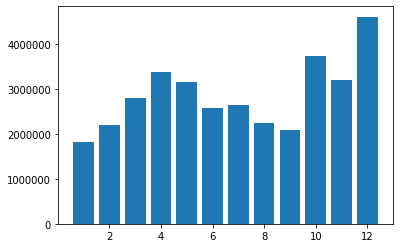

In [21]:
results = all_data.groupby('Month').sum()
months = range (1,13)
plt.bar(months, results['Sales'])
plt.show()

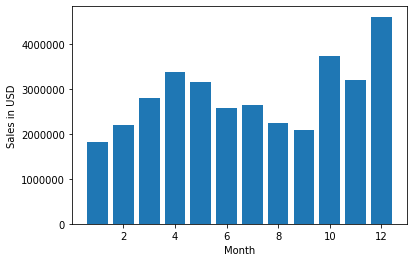

In [22]:
results = all_data.groupby('Month').sum()
months = range (1,13)
plt.bar(months, results['Sales'])
plt.ylabel("Sales in USD")
plt.xlabel('Month')
plt.show()

### 2: What city had highest number of sales?

In [23]:
#so add city column
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
5,NaN,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
6,NaN,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
7,NaN,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [24]:
#so need to extract city from purchas address.
#lets use .apply() = lets us apply random fx on entire column
#looking at data we see that the city is btw two columns.
#so lets write a function to split and pull out
all_data['Column'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()
    

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
5,NaN,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
6,NaN,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
7,NaN,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [25]:
# but to make a function we can do more with it later:
#use lambda fx when you need to take action on something within a column
def get_city(address):
    return address.split(',')[1]

#let's get the state to avoid problem with cities with same name
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Column,City
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,Dallas TX
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Boston MA
5,NaN,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Los Angeles CA
6,NaN,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA
7,NaN,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Los Angeles CA


In [26]:
all_data = all_data.drop('Column',1) #dropping old column
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
5,NaN,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
6,NaN,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
7,NaN,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [27]:
# but to make a function we can do more with it later:
#use lambda fx when you need to take action on something within a column
def get_city(address):
    return address.split(',')[1]

#let's get the state to avoid problem with cities with same name
def get_state(address):
    return address.split(',')[2].split(' ')[1]

#let's use f string to reformt
all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
5,NaN,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
6,NaN,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
7,NaN,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [28]:
#now what city have highest number of sales
results = all_data.groupby('City').sum()
results

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales
City,,,,,
Atlanta (GA),0.0,16602,2.779908e+06,104794,2.795499e+06
Austin (TX),0.0,11153,1.809874e+06,69829,1.819582e+06
Boston (MA),0.0,22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),0.0,16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),0.0,33289,5.421435e+06,208325,5.452571e+06
New York City (NY),0.0,27932,4.635371e+06,175741,4.664317e+06
Portland (ME),0.0,2750,4.471893e+05,17144,4.497583e+05
Portland (OR),0.0,11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),0.0,50239,8.211462e+06,315520,8.262204e+06


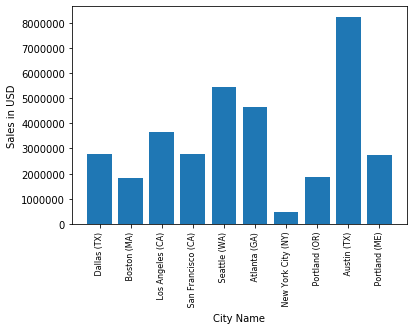

In [29]:
results = all_data.groupby('City').sum()
cities = all_data['City'].unique() #unique in a column
plt.bar(cities, results['Sales'])
plt.xticks(cities,rotation='vertical', size=8)
plt.ylabel("Sales in USD")
plt.xlabel('City Name')
plt.show()

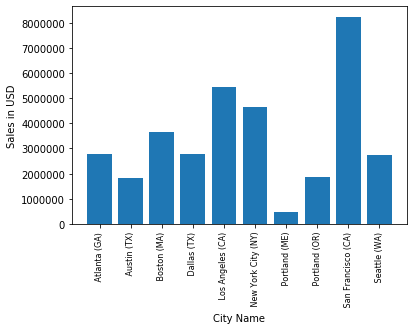

In [30]:
# problem with above. Doesn't match out groupby look at data
#why?
#the .unique messes with order of data. need to fix that
#so we need the cities to be in smae order as sales 
cities = [city for city, df in all_data.groupby('City')]

results = all_data.groupby('City').sum()

#cities = all_data['City'].unique() #unique in a column

plt.bar(cities, results['Sales'])
plt.xticks(cities,rotation='vertical', size=8)
plt.ylabel("Sales in USD")
plt.xlabel('City Name')
plt.show()

### 3: What time should we display ads to maximize liklihood of cutomer's buying product??

In [31]:
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
2,NaN,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
4,NaN,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
5,NaN,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
6,NaN,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
7,NaN,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [32]:
#so we'll need to mess around with the order dates
#let's convert order date into a date/time object which we can do in python with a date/time library
all_data['Order Date'] = pd.to_datetime(all_data['Order Date']) #converst int into datetime

In [33]:
all_data.head() #check format change

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
2,NaN,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
4,NaN,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
5,NaN,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
6,NaN,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
7,NaN,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [36]:
#now we can add an hour column to the data
all_data['Hour'] = all_data['Order Date'].dt.hour #simply now we changed the format
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
2,NaN,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
4,NaN,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
5,NaN,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
6,NaN,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
7,NaN,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


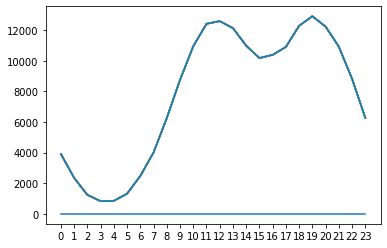

In [38]:
#now let's graph
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count()) #number of occurances of order/specific hr
plt.xticks(hours)
plt.show()

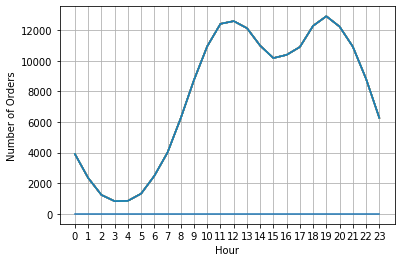

In [40]:
#now let's graph
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count()) #number of occurances of order/specific hr
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Based on chart. Maybe add right before 10 Am or before 7 pm. B/c that'st the peak of sale orders.

### What products are bought togther?

In [41]:
#We can use the order ID number. If the same, means they are ordered to gether.
#so, let's count the duplicate order ID numbers to figure out. 
#so. 1st: How many rows have duplicate order Id numbers.
df = all_data[all_data['Order ID'].duplicated(keep=False)] #so now a df with just duplicates
# hit shift + tab at end of doc string to figure keep=False.
df.head(20)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
5,NaN,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
6,NaN,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
20,NaN,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42
21,NaN,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42
32,NaN,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
33,NaN,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31
34,NaN,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0
35,NaN,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0
121,NaN,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7
122,NaN,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7


In [42]:
#okay, so let's get all items on the same line
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
5,NaN,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
6,NaN,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
20,NaN,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
21,NaN,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
32,NaN,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [44]:
#now let's get rid of duplicates in order ID
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
5,176560,"Google Phone,Wired Headphones"
20,176574,"Google Phone,USB-C Charging Cable"
32,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
34,176586,"AAA Batteries (4-pack),Google Phone"
121,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [47]:
#now go over rows and count the pairs
from itertools import combinations
from collections import Counter

In [49]:
count = Counter()

#use grouped for sublist
for row in df['Grouped']:#gets us the entires in Grouped
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))#2 is for 2 most common products
print(count)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [50]:
#improve formatting
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [51]:
#okay. So now know the 2 items sold most commonly together

### 5: What product sold the most? why?

In [52]:
product_group = all_data.groupby('Product')
product_group.sum()

,Unnamed: 0,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,,
20in Monitor,0.0,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,0.0,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,0.0,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,0.0,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),0.0,27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),0.0,31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,0.0,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,0.0,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,0.0,4819,1440000.00,34224,1445700.00,68815,142789


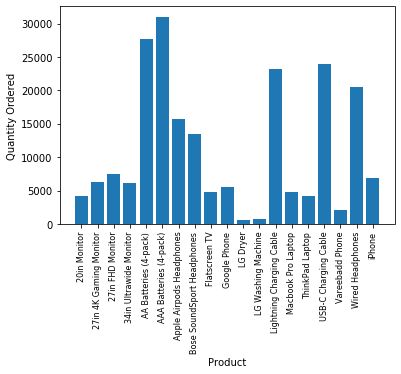

In [56]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)

plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

In [57]:
#so AAA battires sold the most. Chargin cable etc. 
#why? items are cheaper
#but can we prove this?
#yes we could overlay a price graph to prove this


In [58]:
#so let's group by product. prices
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


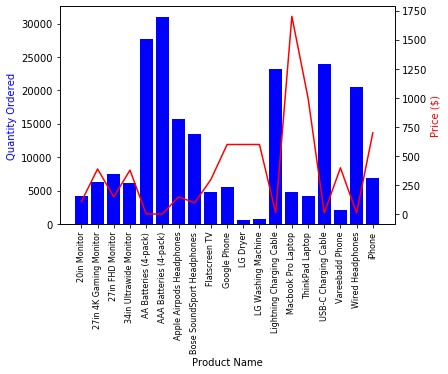

In [64]:
# now let's add a second y axis to matplotlib chart

# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='b')
ax2.plot(products, prices, color='r')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price ($)', color='r')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

In [65]:
#The overlay can't tell us everything. But helps. We can build more questions of of this.